# Lab of data analysis with python

    Author: Jesús Fernández Bes
            Jerónimo Arenas García (jeronimo.arenas@uc3m.es)
            Jesús Cid Sueiro (jcid@tsc.uc3m.es)

    Notebook version: 1.1 (Sep 20, 2017)

    Changes: v.1.0 - First version.
             v.1.1 - Compatibility with python 2 and python 3

    Pending changes:

In this lab we will introduce some of the modules that we will use in the rest of the labs of the course.

The usual beginning of any python module is a list of import statements. In most our file we will use the following modules:

* numpy: The basic scientific computing library.
* csv: Used for input/output in using comma separated values files, one of the standards formats in data management.
* matplotlib: Used for plotting figures and graphs
* sklearn: Scikit-learn is the machine learning library for python. 

In [1]:
%matplotlib inline
# Needed to include the figures in this notebook, you can remove it
# to work with a normal script
    
import numpy as np
import csv
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

/Users/jcid/anaconda/envs/mypy36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. NUMPY 

The _numpy_ module is useful for scientific computing in Python.

The main data structure in _numpy_ is the n-dimensional array. You can define a _numpy_ _array_ from a list or a list of lists. Python will try to build it with the appropiate dimensions. You can check the dimensions of the array with _shape()_

In [2]:
my_array = np.array([[1, 2],[3, 4]])
print(my_array)
print(np.shape(my_array))

[[1 2]
 [3 4]]
(2, 2)


Define a new 3x2 array named *my_array2* with  [1, 2, 3] in the first row and [4,5,6] in the second.
Check the dimension of the array.

In [4]:
#<SOL>
#</SOL>

[[1 2 3]
 [4 5 6]]
(2, 3)


There are a number of operations you can do with numpy arrays similar to the ones you can do with matrices in Matlab. One os the most important is **slicing**. We saw it when we talked about lists, it consists in extracting some subarray of the array.

In [5]:
my_array3 = my_array[:,1]
print(my_array3)
print(my_array[1,0:2])

[2 4]
[3 4]


One important thing to consider when you do slicing are the dimensions of the output array. Check the shape of *my_array3*. Check also its dimension with function _ndim_: 

In [6]:
#<SOL>
#</SOL>

(2,)
1


If you have correctly computed it you will see that *my_array3* is one dimensional. Sometimes this can be a problem when you are working with 2D matrixes (and vectors can be considered as 2D matrixes with one of the sizes equal to 1). To solve this, _numpy_ provides the _newaxis_ constant.

In [7]:
my_array3 = my_array3[:,np.newaxis]

Check again the shape and dimension of *my_array3*

In [9]:
#<SOL>
#</SOL>

[[2]
 [4]]
(2, 1)
2


It is possible to extract a single row or column from a 2D numpy array so that the result is still 2D, without explictly recurring to _np.newaxis_. Compare the outputs of the following print commands.


In [10]:
print(my_array[:,1])
print(my_array[:,1].shape)
print(my_array[:,1:2])
print(my_array[:,1:2].shape)

[2 4]
(2,)
[[2]
 [4]]
(2, 1)


Another important array manipulation method is array _concatenation_ or _stacking_. It is useful to always state explicitly in which direction we want to stack the arrays. For example in the following example we are stacking the arrays vertically.

In [ ]:
print(my_array)
print(my_array2)
print(np.concatenate( (my_array, my_array2) , axis=1)) # columnwise concatenation

**EXERCISE:** Concatenate the first column of *my_array* and the second column of *my_array2*

In [ ]:
#<SOL>
#</SOL>

You can create _numpy_ arrays in several ways, not only from lists. For example _numpy_ provides a number of functions to create special types of matrices. 

**EXERCISE:** Create 3 arrays usings _ones_, _zeros_ and _eye_. If you have any doubt about the parameters of the functions have a look at the help with the function _help( )_.

In [ ]:
#<SOL>
#</SOL>

Finally _numpy_ provides all the basic matrix operations: multiplications, dot products, ...
You can find information about them in the [Numpy manual](http://docs.scipy.org/doc/numpy/reference/).

In addition to _numpy_ we have a more advanced library for scientific computing, [Scipy](http://www.scipy.org/scipylib/index.html), that includes modules for linear algebra, signal processing, Fourier transform, ...

## 2. Matplotlib

One important step of data analysis is data visualization. In python the simplest plotting library is _matplotlib_ and its sintax is similar to Matlab plotting library. In the next example we plot two sinusoids with different simbols.

In [ ]:
t = np.arange(0.0, 1.0, 0.05)
a1 = np.sin(2*np.pi*t)
a2 = np.sin(4*np.pi*t)
#s = sin(2*3.14159*t)

plt.figure()
ax1 = plt.subplot(211)
ax1.plot(t,a1)
plt.xlabel('t')
plt.ylabel('a_1(t)')
ax2 = plt.subplot(212)
ax2.plot(t,a2, 'r.')
plt.xlabel('t')
plt.ylabel('a_2(t)')
plt.show()

## 3. Classification example


One of the main machine learning problems is clasification. In the following example, we will load and visualize a dataset that can be used in a clasification problem.

The [iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) is one of the most popular pattern recognition datasets. It consists on 150 instances of 4 features of iris flowers:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

The objective is usually to distinguish three different classes of iris plant: Iris setosa, Iris versicolor, and Iris virginica.

### 3.1 Loading the data

We give you the data in _.csv_ format. In each line of the csv file we have the 4 real-valued features of each instance and then a string defining the class of that instance: Iris-setosa, Iris-versicolor or Iris-virginica. There are 150 instances of flowers in the csv file. 

Let's se how we can load the data in an _array_

In [13]:
# Open up the csv file in to a Python object
csv_file_object = csv.reader(open('iris_data.csv', 'r')) 
datalist = []                    # Create a variable called 'data'.
for row in csv_file_object:      # Run through each row in the csv file,

    datalist.append(row)         # adding each row to the data variable


data = np.array(datalist)  # Then convert from a list to an array
                           # Be aware that each item is currently
                           # a string in this format
print(np.shape(data))
X = data[:,0:-1]
label = data[:,-1,np.newaxis]
print(X.shape)
print(label.shape)

(150, 5)
(150, 4)
(150, 1)
<class 'numpy.str_'>


In the previous code we have saved the features in matrix X and the class labels in the vector labels. Both are 2D _numpy_ _arrays_.
We are also printing the shapes of each variable (see that we can also use `array_name.shape` to get the shape, appart from function _shape()_). Checking the shape of matrices is a convenient way to prevent mistakes in your code.

### 3.2 Visualizing the data

Extract the 2 first features of the data (sepal length and width) and plot the first versus the second in a figure, use a different color for the data corresponding to different classes.

First of all you probably want to split the data according to each class label.

/Users/jcid/anaconda/envs/mypy36/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/jcid/anaconda/envs/mypy36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/jcid/anaconda/envs/mypy36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/jcid/anaconda/envs/mypy36/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clea

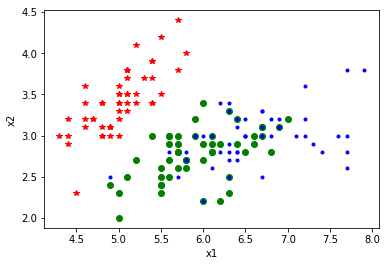

In [16]:
#<SOL>
#</SOL>

According to this plot, which classes seem more difficult to distinguish?  


## 4. Regression example


Now that we know how to load some data and visualize them, we will try to solve a simple regression task.

Our objective in this example is to predict the crime rates in different areas of the US using some socio-demographic data.

This dataset has 127 socioeconomic variables of different nature: categorical, integer, real, and for some of them there are also missing data ([check wikipedia](https://en.wikipedia.org/wiki/Missing_data)). This is usually a problem when training machine learning models, but we will ignore that problem and take only a small number of variables that we think can be useful for regression and which have no missing values.

5. population: population for community
6. householdsize: mean people per household
17. medIncome: median household income 

The objective in the regresion problem is another real value that contains the *total number of violent crimes per 100K population*.

### 4.1 Loading the data

First of all, load the data from file _communities.csv_ in a new array. This array should have 1994 rows (instances) and 128 columns.



In [ ]:
#<SOL>
#</SOL>

Take the columns (5,6,17) of the data and save them in a matrix *X_com*. This will be our input data. Convert this array into a _float_ array. The shape should be (1994,3) 

Get the last column of the data and save it in an array called *y_com*. Convert this matrix into a _float_ array.
Check that the shape is (1994,1) .

In [ ]:
#<SOL>
#</SOL>

Plot each variable in *X_com* versus *y_com* to have a first (partial) view of the data.

In [ ]:
#<SOL>
#</SOL>

### 4.2 Train/Test splitting

Now, we are about to start doing machine learning. But, first of all, we have to separate our data in train and test partitions.

The train data will be used to adjust the parameters (train) of our model.
The test data will be used to evaluate our model.

Use *sklearn.cross_validation.train_test_split* to split the data in *train* (60%) and *test* (40%). Save the results in variables named *X_train*, *X_test*, *y_train*, *y_test*.

#### Important note
In real applications, you would have no access to any targets for the test data. However, for illustratory purposes, when evaluating machine learning algorithms it is common to set aside a _test partition_, including the corresponding labels, so that you can use these targets to assess the performance of the method. When proceeding in this way, the test labels should never be used during the design. It is just allowed to use them as a final assessment step once the classifier or regression model has been fully adjusted.

In [ ]:
#<SOL>
#</SOL>

### 4.3  Normalization

Most machine learning algorithms require that the data is standardized (mean=0, standard deviation= 1). Scikit-learn provides a tool to do that in the object _sklearn.preprocessing.StandardScaler_ (but you can also try and program it by yourself, it easier than in MATLAB!!)

In [ ]:
#<SOL>
#</SOL>

### 4.4 Training

We will apply two different K-NN regressors for this example. One with K (*n_neighbors*) = 1 and the other with K=7.

Read the [API](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) and [this example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#example-neighbors-plot-regression-py) to understand how to fit the model.

In [ ]:
#<SOL>
#</SOL>

### 4.5 Prediction and evaluation

Now use the two models you have trained to predict the test output *y_test*. To evaluate it measure the MSE.

The formula of MSE is

$$\text{MSE}=\frac{1}{K}\sum_{k=1}^{K}({\hat{y}}-y)^2$$

In [ ]:
#<SOL>
#</SOL>

### 4.6 Saving the results

Finally we will save all our predictions for the model with K=1 in a csv file. To do so you can use the following code Snippet, where *y_pred* are the predicted output values for test.

In [ ]:
#<SOL>
#</SOL>